<a href="https://colab.research.google.com/github/ZyanHere/Electrical-fault-dectection-and-classification/blob/main/Electrical_Fault_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dataset1 = pd.read_csv("/content/classData.csv")

In [ ]:
dataset1.head().style.set_properties(**{'background-color':'skyblue',
                                           'color':'black',
                                           'border-color':'lightyellow'})


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
dataset1.shape

(7861, 10)

In [ ]:
print(f"detect_dataset has {dataset1.shape[0]} instances and {dataset1.shape[1]} attributes.")

detect_dataset has 7861 instances and 10 attributes.


In [ ]:
 print(f"detect_dataset has {dataset1.duplicated().sum()} duplicated values")

detect_dataset has 0 duplicated values


In [ ]:
dataset1.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


Text(0.5, 1.0, 'Ground Fault')

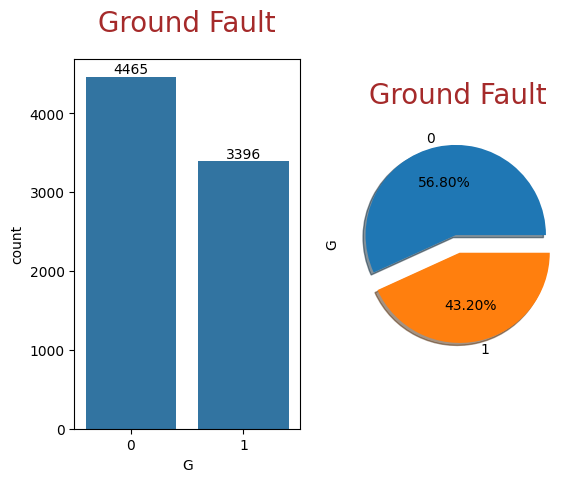

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=dataset1)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=dataset1['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20)

Text(0.5, 1.0, 'Line A Fault')

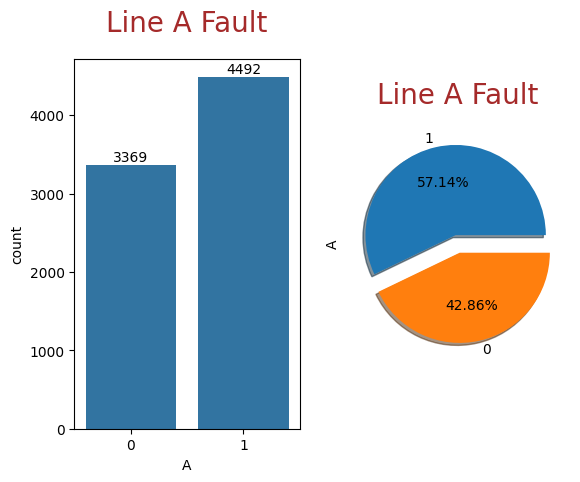

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='A', data=dataset1)
ax.bar_label(ax.containers[0])
plt.title("Line A Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=dataset1['A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line A Fault", fontsize = 20,color='Brown',pad=20)

Text(0.5, 1.0, 'Line B Fault')

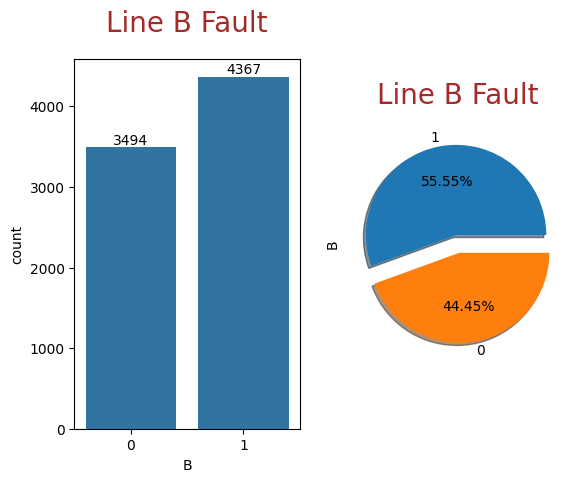

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='B', data=dataset1)
ax.bar_label(ax.containers[0])
plt.title("Line B Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=dataset1['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line B Fault", fontsize = 20,color='Brown',pad=20)

Text(0.5, 1.0, 'Line C Fault')

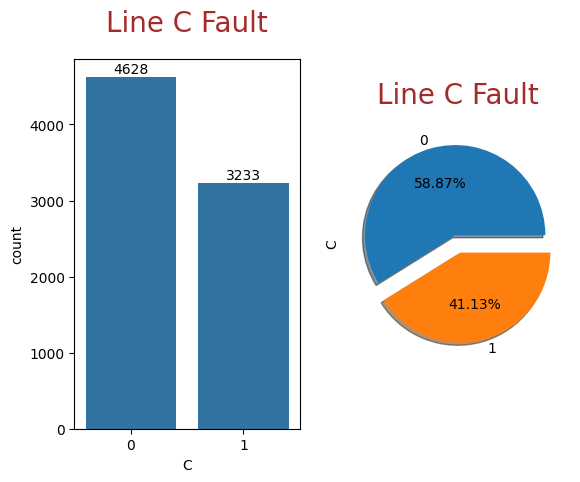

In [ ]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='C', data=dataset1)
ax.bar_label(ax.containers[0])
plt.title("Line C Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=dataset1['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line C Fault", fontsize = 20,color='Brown',pad=20)

 **Creating "FaultType" column with different output joined together**

In [ ]:
dataset1['FaultType'] = dataset1['G'].astype('str') + dataset1['C'].astype('str') + dataset1['B'].astype('str') + dataset1['A'].astype('str')

In [ ]:
dataset1.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,FaultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


**Unique values in FaultType**

In [ ]:
dataset1["FaultType"].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

[G C B A]
[0 0 0 0] -> No Fault 
[1 0 0 1] -> LG Fault 
[0 1 1 0] -> LL Fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG Fault



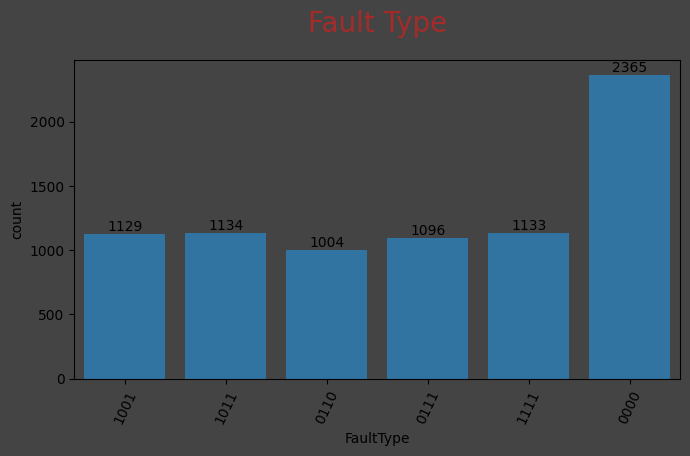

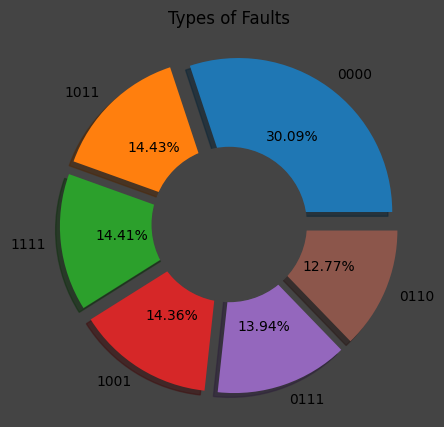

In [ ]:
print("[G C B A]\n[0 0 0 0] -> No Fault \n[1 0 0 1] -> LG Fault \n[0 1 1 0] -> LL Fault\n[1 0 1 1] -> LLG Fault\n[0 1 1 1] -> LLL Fault\n[1 1 1 1] -> LLLG Fault\n")

fig = plt.figure(figsize=(7, 8))
fig.patch.set_facecolor('#444444')

ax1 = plt.subplot(2, 1, 1)
ax1.set_facecolor('#444444')
sns.countplot(x='FaultType', data=dataset1)
ax1.bar_label(ax1.containers[0])
plt.title("Fault Type", fontsize=20, color='Brown', pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

plt.figure(figsize=(8,5))
dataset1.FaultType.value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
donut = plt.Circle((0,0),0.5,color='#444444')
p = plt.gcf()
plt.gca().add_artist(donut)

p.set_facecolor('#444444')
plt.title("Types of Faults")
plt.ylabel("")
plt.show()

In [ ]:
# Counting different labels
dataset1["FaultType"].value_counts()

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: FaultType, dtype: int64

<ipython-input-18-e757233243fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset1.corr(), annot=True, cmap='Blues')


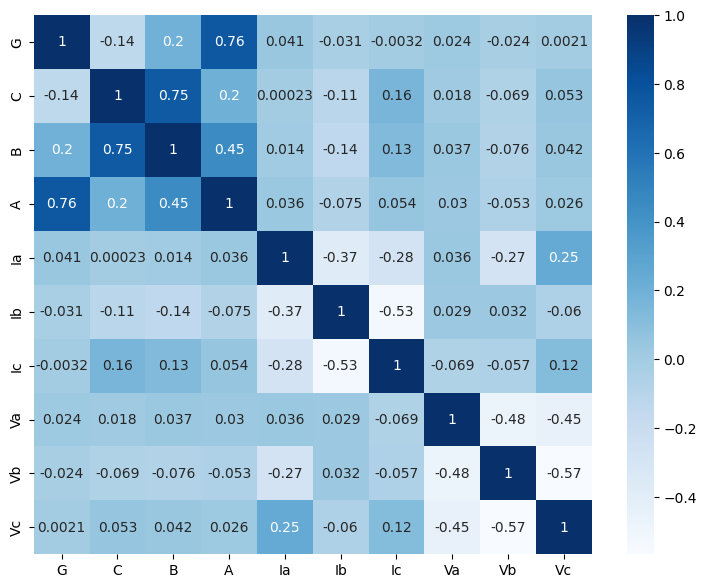

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(dataset1.corr(), annot=True, cmap='Blues')
plt.show()

**Voltage vs Current**

In [ ]:
# plt.figure(figsize=(15,4))

# a1 = plt.subplot2grid((1,3),(0,0))
# a1.scatter(dataset1['Ia'], dataset1['Va'])
# a1.set_title('Line a')
# a1.set_xlabel('Ia')
# a1.set_ylabel('Va')

# a2 = plt.subplot2grid((1,3),(0,1))
# a2.scatter(dataset1['Ib'], dataset1['Vb'])
# a2.set_title('Line b')
# a2.set_xlabel('Ib')
# a2.set_ylabel('Vb')

# a3 = plt.subplot2grid((1,3),(0,2))
# a3.scatter(dataset1['Ic'], dataset1['Vc'])
# a3.set_title('Line c')
# a3.set_xlabel('Ic')
# a3.set_ylabel('Vc')

# plt.show()

**Assigning to the dataframe**

In [ ]:
NF = dataset1.loc[dataset1["FaultType"] == "0000"]
LL = dataset1.loc[dataset1["FaultType"] == "0110"]
LG = dataset1.loc[dataset1["FaultType"] == "1001"]
LLG = dataset1.loc[dataset1["FaultType"] == "1011"]
LLL = dataset1.loc[dataset1["FaultType"] == "0111"]
LLLG = dataset1.loc[dataset1["FaultType"] == "1111"]

In [ ]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(dataset1[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(dataset1[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 5})
    axs[1].legend(loc='upper right', prop={'size': 5})

    plt.show()

<ipython-input-21-9c226747c09f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
<ipython-input-21-9c226747c09f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[colb], label='Line Voltage', hist=True, color='#

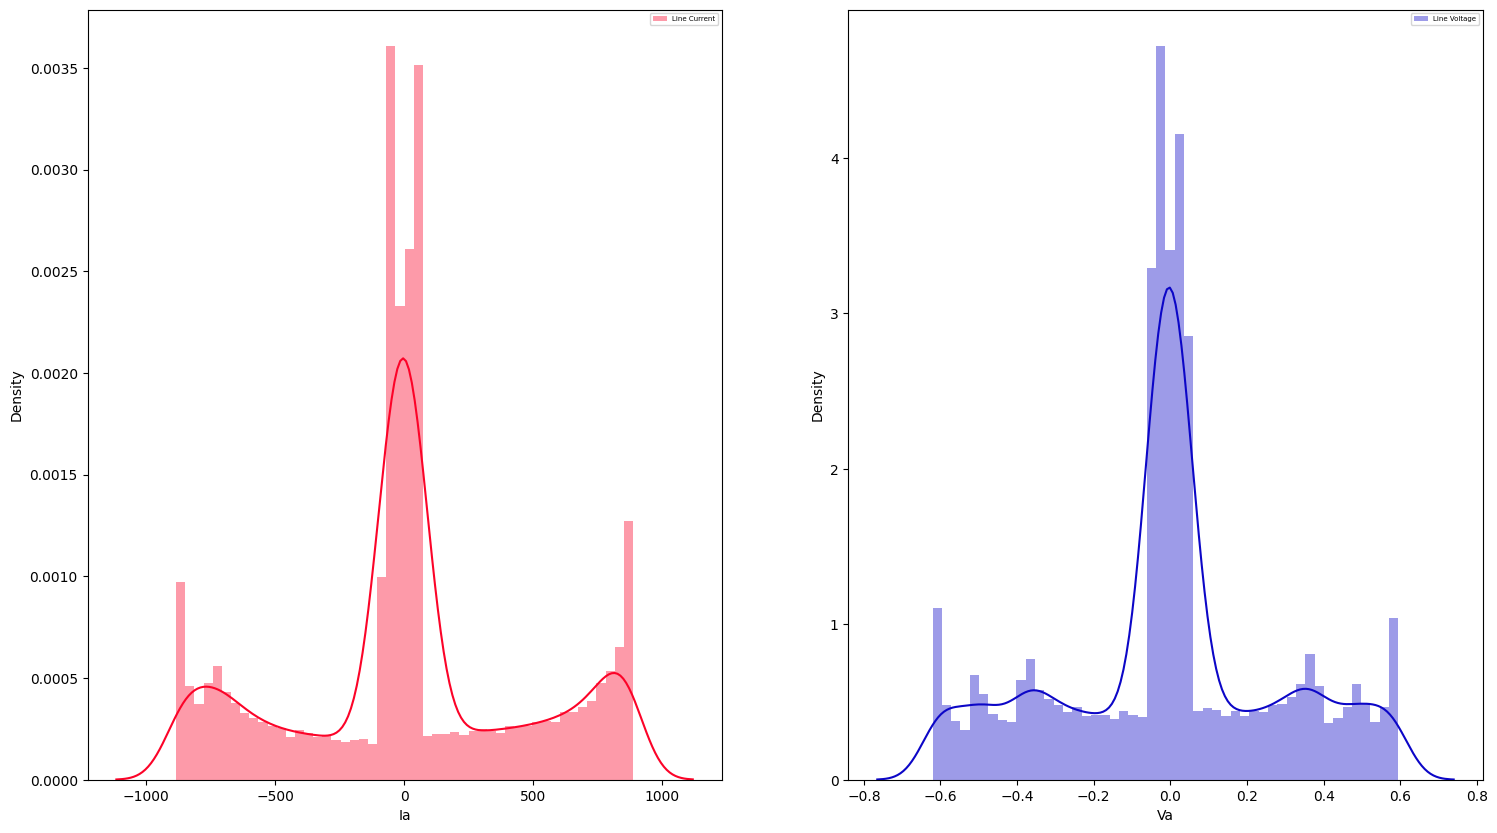

<ipython-input-21-9c226747c09f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
<ipython-input-21-9c226747c09f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[colb], label='Line Voltage', hist=True, color='#

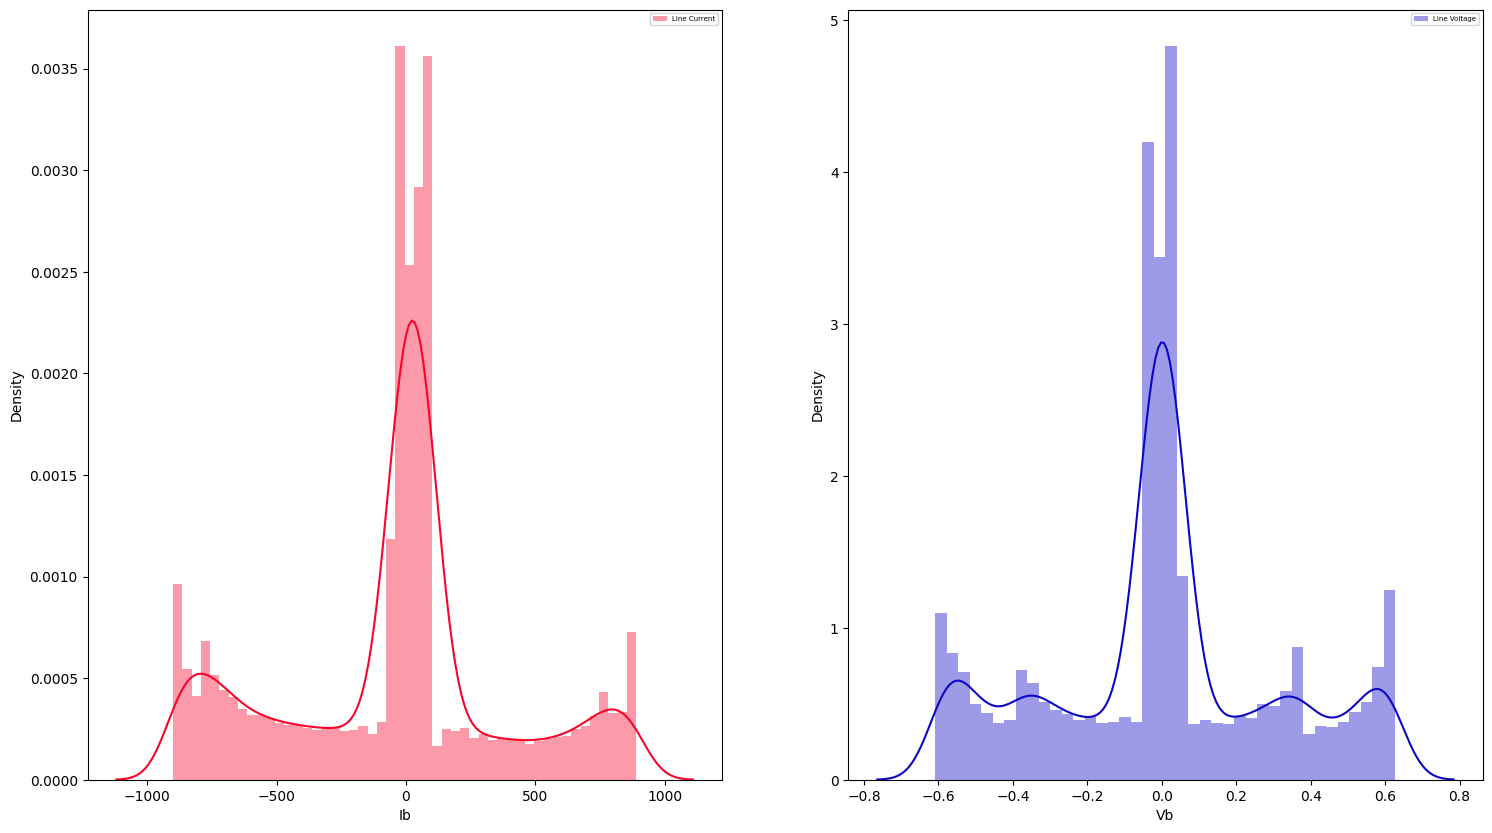

<ipython-input-21-9c226747c09f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
<ipython-input-21-9c226747c09f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset1[colb], label='Line Voltage', hist=True, color='#

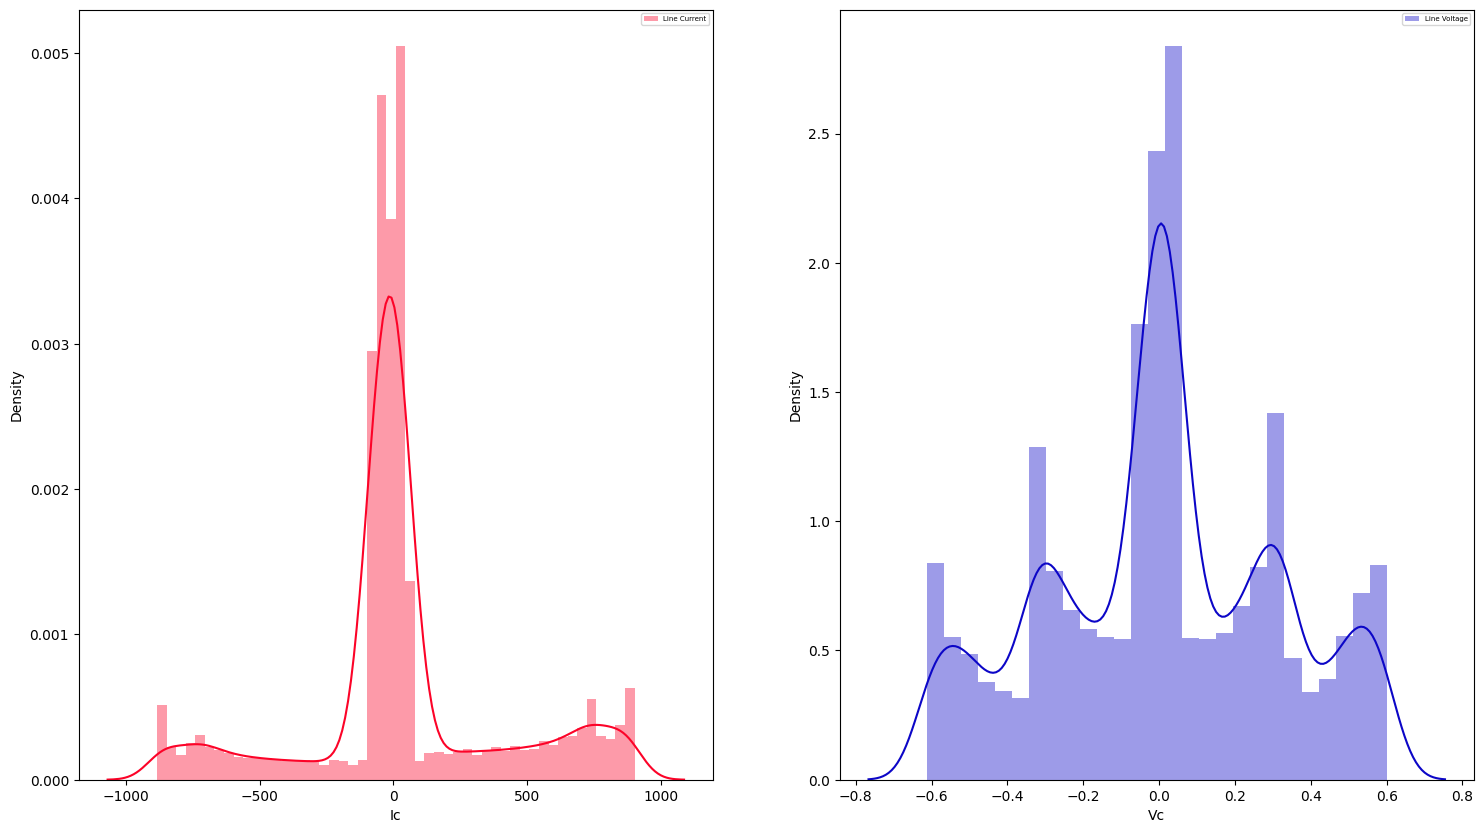

In [ ]:
lines = [
    ('Ia', 'Va'),
    ('Ib', 'Vb'),
    ('Ic', 'Vc')
]
for cola, colb in lines:
    dist(cola,colb)
    print('\n')

In [ ]:
# print("**For No Fault**")
# plt.subplots(1,3,figsize=(10,4))
# plt.subplot(131)
# sns.scatterplot(x=NF['Ia'],y=NF['Va'], color = 'red')

# plt.subplot(132)
# sns.scatterplot(x=NF['Ib'],y=NF['Vb'], color = 'blue')

# plt.subplot(133)
# sns.scatterplot(x=NF['Ic'],y=NF['Vc'], color = 'green')

In [ ]:
# sns.pairplot(dataset1,hue='FaultType')
# plt.show()

# Visualization

**Current and voltage relation under different conditions**

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [ ]:
from tables.utils import list_logged_instances
fig = go.Figure()

fig = make_subplots(rows=2, cols=3,
                    subplot_titles=("No Fault", "LL Fault", "LLL Fault", "LG Fault",
                                   "LLG Fault", "LLLG Fault"))

fig.add_trace(
    go.Scatter(x=NF["Ia"], y=NF["Va"], name = "Line A", legendgroup = 'A',
               line=dict(color='#EC2781')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=NF["Ib"], y=NF["Vb"], name = "Line B", legendgroup = 'B',
               line=dict(color='#3C8DD6')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=NF["Ic"], y=NF["Vc"], name = "Line C", legendgroup = 'C',
               line=dict(color='black')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=LL["Ia"], y=LL["Va"], legendgroup = 'A',
    showlegend = False,line=dict(color='#EC2781')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=LL["Ib"], y=LL["Vb"],legendgroup = 'B',
    showlegend = False, line=dict(color='#3C8DD6')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=LL["Ic"], y=LL["Vc"], legendgroup = 'C',
    showlegend = False, line=dict(color='black')),
    row=1, col=2
)



fig.add_trace(
    go.Scatter(x=LLL["Ia"], y=LLL["Va"],legendgroup = 'A',
    showlegend = False, line=dict(color='#EC2781')),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=LLL["Ib"], y=LLL["Vb"], legendgroup = 'B',
    showlegend = False, line=dict(color='#3C8DD6')),
    row=1, col=3
)
fig.add_trace(
    go.Scatter(x=LLL["Ic"], y=LLL["Vc"], legendgroup = 'C',
    showlegend = False, line=dict(color='black')),
    row=1, col=3
)



fig.add_trace(
    go.Scatter(x=LG["Ia"], y=LG["Va"], legendgroup = 'A',
    showlegend = False, line=dict(color='#EC2781')),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=LG["Ib"], y=LG["Vb"], legendgroup = 'B',
    showlegend = False, line=dict(color='#3C8DD6')),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=LG["Ic"], y=LG["Vc"], legendgroup = 'C',
    showlegend = False, line=dict(color='black')),
    row=2, col=1
)




fig.add_trace(
    go.Scatter(x=LLG["Ia"], y=LLG["Va"], legendgroup = 'A',
    showlegend = False, line=dict(color='#EC2781')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=LLG["Ib"], y=LLG["Vb"], legendgroup = 'B',
    showlegend = False, line=dict(color='#3C8DD6')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=LLG["Ic"], y=LLG["Vc"], legendgroup = 'C',
    showlegend = False, line=dict(color='black')),
    row=2, col=2
)


fig.add_trace(
    go.Scatter(x=LLLG["Ia"], y=LLLG["Va"], legendgroup = 'A',
    showlegend = False, line=dict(color='#EC2781')),
    row=2, col=3
)
fig.add_trace(
    go.Scatter(x=LLLG["Ib"], y=LLLG["Vb"], legendgroup = 'B',
    showlegend = False, line=dict(color='#3C8DD6')),
    row=2, col=3
)
fig.add_trace(
    go.Scatter(x=LLLG["Ic"], y=LLLG["Vc"], legendgroup = 'C',
    showlegend = False, line=dict(color='black')),
    row=2, col=3
)



fig.update_layout(
    plot_bgcolor = "#ECECEC",
    title = "<b>Current and Voltage in line a, b, c under different conditions</b>",
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell",

    ),
    annotations = list(fig.layout.annotations) +
    [go.layout.Annotation(
            x=-0.07,
            y=0.5,
            font=dict(
                size=12
            ),
            text="<b> Votage </b>",
            textangle=-90,
            xref="paper",
            yref="paper"
        )
    ] +
    [go.layout.Annotation(
            x=0.5,
            y=-0.1,
            font=dict(
                size=12, color = 'black'
            ),
            showarrow=False,
            text="<b> Current </b>",
            textangle=-0,
            xref="paper",
            yref="paper"
        )
    ]
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showline = True, linewidth = 2, linecolor = "black")

fig.show()

**Current and voltage relationship under no fault condition**

In [ ]:
fig = go.Figure()

x_no_a = NF["Ia"]
y_no_a = NF["Va"]
x_no_b = NF["Ib"]
y_no_b = NF["Vb"]
x_no_c = NF["Ic"]
y_no_c = NF["Vc"]



fig.add_trace(go.Scatter(x = x_no_a, y = y_no_a, mode = "lines+markers", name = "A line",
                        line=dict(color='#EC2781', width=2)))
fig.add_trace(go.Scatter(x = x_no_b, y = y_no_b, mode = "lines+markers", name = "B line",
                        line=dict(color='#3C8DD6', width=2)))
fig.add_trace(go.Scatter(x = x_no_c, y = y_no_c, mode = "lines+markers", name = "C line",
                        line=dict(color='black', width=2)))



fig.update_layout(
    plot_bgcolor = "#ECECEC",
    title = "<b>Current and Voltage in lina a, b, c under no fault condition</b>",
    title_font_size = 7,
    title_font_color = "black",
    title_pad_t = 10,
    title_pad_l = 10,
     xaxis = dict(
        title_text = "<b> Current </b>",
        titlefont = dict(size = 12)
    ),
    yaxis = dict(
        title_text = "<b> Voltage </b>",
        titlefont = dict(size = 12)
    ),

    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")



fig.show()

**Current and voltage inline A under different conditionS**

In [ ]:
# x_no_a = NF["Ia"]
# y_no_a = NF["Va"]

# x_LL_a = LL["Ia"]
# y_LL_a = LL["Va"]

# x_LG_a = LG["Ia"]
# y_LG_a = LG["Va"]

# x_LLG_a = LLG["Ia"]
# y_LLG_a = LLG["Va"]

# x_LLLG_a = LLLG["Ia"]
# y_LLLG_a = LLLG["Va"]

# x_LLL_a = LLL["Ia"]
# y_LLL_a = LLL["Va"]



# fig = make_subplots()
# fig.add_trace(go.Scatter(x = x_no_a, y = y_no_a, mode = "lines+markers", name = "No Fault",
#                         line=dict(color='#EC2781', width=2)))

# fig.add_trace(go.Scatter(x = x_LL_a, y = y_LL_a, mode = "lines+markers", name = "LL Fault",
#                         line=dict(color='#3C8DD6', width=2)))

# fig.add_trace(go.Scatter(x = x_LG_a, y = y_LG_a, mode = "lines+markers", name = "LG Fault",
#                         line=dict(color='black', width=2)))

# fig.add_trace(go.Scatter(x = x_LLG_a, y = y_LLG_a, mode = "lines+markers", name = "LLG Fault",
#                         line=dict(color='blue', width=2)))

# fig.add_trace(go.Scatter(x = x_LLLG_a, y = y_LLLG_a, mode = "lines+markers", name = "LLLG Fault",
#                         line=dict(color='magenta', width=2)))

# fig.add_trace(go.Scatter(x = x_LLL_a, y = y_LLL_a, mode = "lines+markers", name = "LLL Fault",
#                         line=dict(color='green', width=2)))




# fig.update_layout(
#     plot_bgcolor = "#ECECEC",
#     title = "<b>Current and Voltage in line A under different conditions</b>",
#     title_font_size = 16,
#     title_font_color = "black",
#     title_pad_t = 5,
#     title_pad_l = 20,
#      xaxis = dict(
#         title_text = "<b> Current </b>",
#         titlefont = dict(size = 12)
#     ),
#     yaxis = dict(
#         title_text = "<b> Voltage </b>",
#         titlefont = dict(size = 12)
#     ),

#     hoverlabel=dict(
#         bgcolor="white",
#         font_size=16,
#         font_family="Rockwell"
#     )
# )

# fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
# fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")



# fig.show()

Voltage or Current graph, where there is large fluctuation in the graph, there faults have occurred

<ipython-input-29-9923d2bdfe23>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-9923d2bdfe23>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-9923d2bdfe23>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v

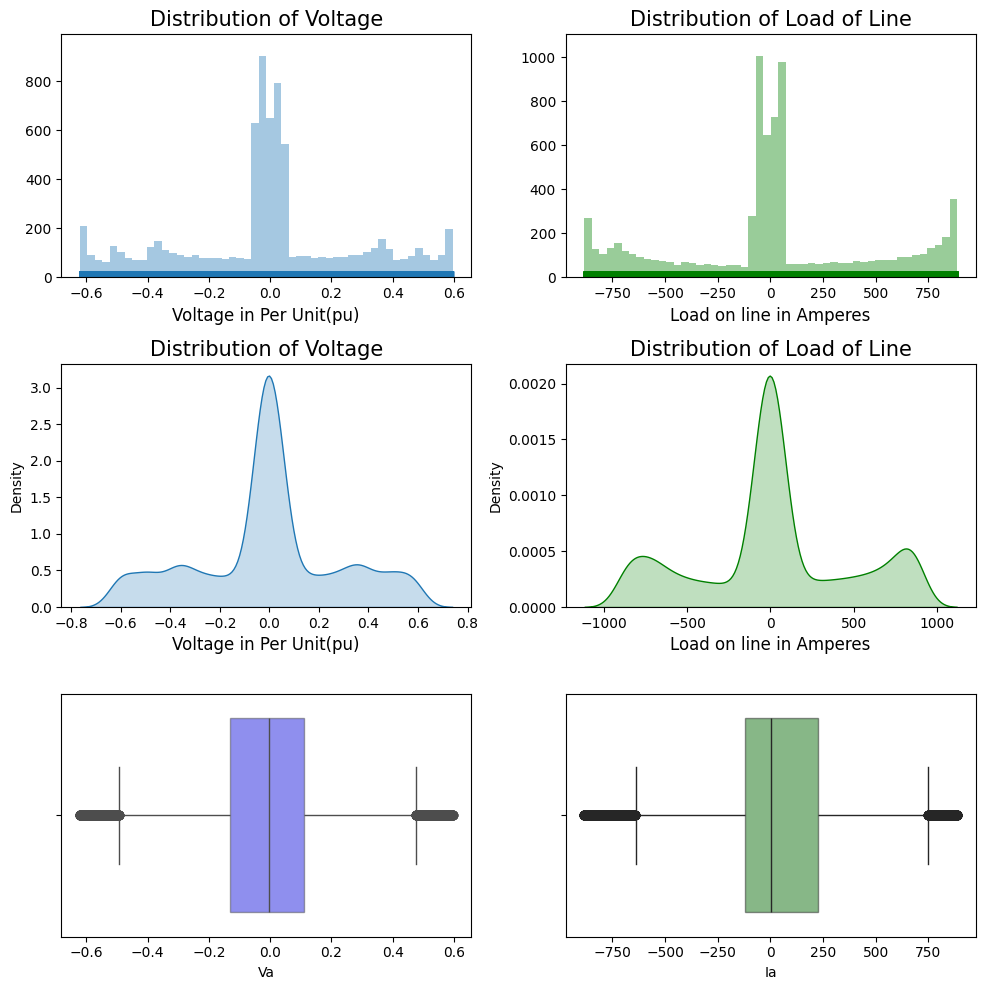

In [ ]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(dataset1['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(dataset1['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(dataset1['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(dataset1['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = dataset1['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = dataset1['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

In [ ]:
X = dataset1.drop(['FaultType'],axis=1)
y = dataset1['FaultType']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Training Accuracy    : 90.59 %
Model Accuracy Score : 90.02 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      0.28      0.44       219
        0111       0.57      1.00      0.73       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           0.90      1573
   macro avg       0.93      0.88      0.86      1573
weighted avg       0.94      0.90      0.89      1573

--------------------------------------------------------


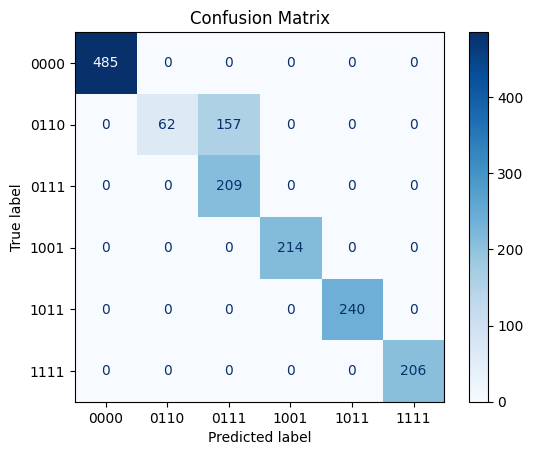

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [ ]:
print("Logistic Regression Classification Report\n\n", classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report

               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      0.28      0.44       219
        0111       0.57      1.00      0.73       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           0.90      1573
   macro avg       0.93      0.88      0.86      1573
weighted avg       0.94      0.90      0.89      1573



Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      1.00      1.00       219
        0111       1.00      1.00      1.00       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


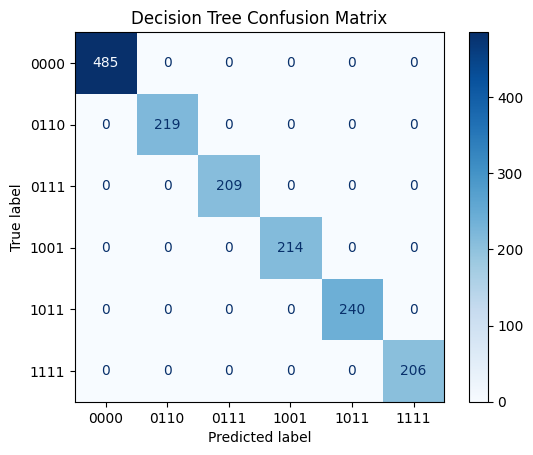

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with Limited Depth
dt_classifier = DecisionTreeClassifier(max_depth=5)  # You can adjust the max_depth parameter
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

dt_train = round(dt_classifier.score(X_train, y_train) * 100, 2)
dt_accuracy = round(accuracy_score(y_pred_dt, y_test) * 100, 2)

print("Training Accuracy    :", dt_train, "%")
print("Model Accuracy Score :", dt_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dt))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

svm_train = round(svm_classifier.score(X_train, y_train) * 100, 2)
svm_accuracy = round(accuracy_score(y_pred_svm, y_test) * 100, 2)

print("Training Accuracy    :", svm_train, "%")
print("Model Accuracy Score :", svm_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svm))
print("\033[1m--------------------------------------------------------\033[0m")

# No confusion matrix is shown for SVM as it doesn't have a direct method like ConfusionMatrixDisplay for Decision Trees.

# You can still print the confusion matrix using sklearn's confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)


Training Accuracy    : 76.1 %
Model Accuracy Score : 75.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       0.90      1.00      0.95       485
        0110       0.79      0.90      0.84       219
        0111       0.48      0.24      0.32       209
        1001       0.75      0.86      0.80       214
        1011       0.74      0.78      0.76       240
        1111       0.48      0.42      0.45       206

    accuracy                           0.76      1573
   macro avg       0.69      0.70      0.69      1573
weighted avg       0.73      0.76      0.74      1573

--------------------------------------------------------
Confusion Matrix:
 [[485   0   0   0   0   0]
 [ 21 198   0   0   0   0]
 [  2  34  51   0  28  94]
 [ 30   0   0 183   1   0]
 [  0   0   0  53 187   0]
 [  1  18  56   9  36  86]]


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      1.00      1.00       219
        0111       1.00      1.00      1.00       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


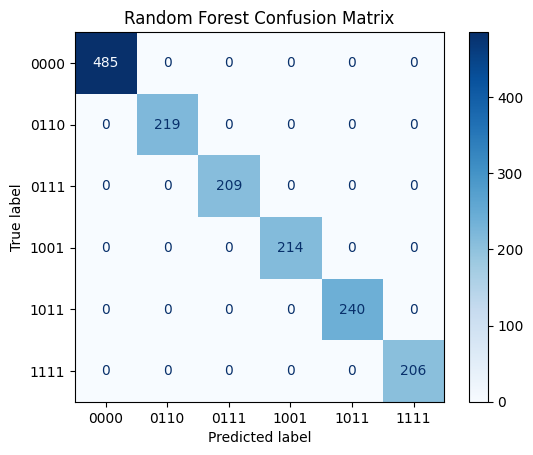

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

rf_train = round(rf_classifier.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", rf_train, "%")
print("Model Accuracy Score :", rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Plot Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

knn_train = round(knn_classifier.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# No confusion matrix is shown for KNN as it doesn't have a direct method like ConfusionMatrixDisplay for Decision Trees.

# You can still print the confusion matrix using sklearn's confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)


Training Accuracy    : 89.95 %
Model Accuracy Score : 82.07 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       0.98      1.00      0.99       485
        0110       0.97      0.97      0.97       219
        0111       0.38      0.35      0.36       209
        1001       0.97      0.99      0.98       214
        1011       0.94      0.96      0.95       240
        1111       0.39      0.39      0.39       206

    accuracy                           0.82      1573
   macro avg       0.77      0.77      0.77      1573
weighted avg       0.81      0.82      0.82      1573

--------------------------------------------------------
Confusion Matrix:
 [[485   0   0   0   0   0]
 [  7 212   0   0   0   0]
 [  1   6  73   0   3 126]
 [  0   0   0 211   3   0]
 [  0   0   3   7 230   0]
 [  1   1 116   0   8  80]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

gb_train = round(gb_classifier.score(X_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(y_pred_gb, y_test) * 100, 2)

print("Training Accuracy    :", gb_train, "%")
print("Model Accuracy Score :", gb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_gb))
print("\033[1m--------------------------------------------------------\033[0m")

# No confusion matrix is shown for Gradient Boosting as it doesn't have a direct method like ConfusionMatrixDisplay for Decision Trees.

# You can still print the confusion matrix using sklearn's confusion_matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", cm_gb)


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      1.00      1.00       219
        0111       1.00      1.00      1.00       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------
Confusion Matrix:
 [[485   0   0   0   0   0]
 [  0 219   0   0   0   0]
 [  0   0 209   0   0   0]
 [  0   0   0 214   0   0]
 [  0   0   0   0 240   0]
 [  0   0   0   0   0 206]]


In [ ]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) with RBF Kernel
svm_rbf_classifier = SVC(kernel='rbf')
svm_rbf_classifier.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf_classifier.predict(X_test)

svm_rbf_train = round(svm_rbf_classifier.score(X_train, y_train) * 100, 2)
svm_rbf_accuracy = round(accuracy_score(y_pred_svm_rbf, y_test) * 100, 2)

print("Training Accuracy    :", svm_rbf_train, "%")
print("Model Accuracy Score :", svm_rbf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svm_rbf))
print("\033[1m--------------------------------------------------------\033[0m")

# No confusion matrix is shown for SVM with RBF Kernel as it doesn't have a direct method like ConfusionMatrixDisplay for Decision Trees.

# You can still print the confusion matrix using sklearn's confusion_matrix
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
print("Confusion Matrix:\n", cm_svm_rbf)


Training Accuracy    : 76.1 %
Model Accuracy Score : 75.65 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       0.90      1.00      0.95       485
        0110       0.79      0.90      0.84       219
        0111       0.48      0.24      0.32       209
        1001       0.75      0.86      0.80       214
        1011       0.74      0.78      0.76       240
        1111       0.48      0.42      0.45       206

    accuracy                           0.76      1573
   macro avg       0.69      0.70      0.69      1573
weighted avg       0.73      0.76      0.74      1573

--------------------------------------------------------
Confusion Matrix:
 [[485   0   0   0   0   0]
 [ 21 198   0   0   0   0]
 [  2  34  51   0  28  94]
 [ 30   0   0 183   1   0]
 [  0   0   0  53 187   0]
 [  1  18  56   9  36  86]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)

adaboost_train = round(adaboost_classifier.score(X_train, y_train) * 100, 2)
adaboost_accuracy = round(accuracy_score(y_pred_adaboost, y_test) * 100, 2)

print("Training Accuracy    :", adaboost_train, "%")
print("Model Accuracy Score :", adaboost_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_adaboost))
print("\033[1m--------------------------------------------------------\033[0m")

# No confusion matrix is shown for AdaBoost as it doesn't have a direct method like ConfusionMatrixDisplay for Decision Trees.

# You can still print the confusion matrix using sklearn's confusion_matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix:\n", cm_adaboost)


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

        0000       1.00      1.00      1.00       485
        0110       1.00      1.00      1.00       219
        0111       1.00      1.00      1.00       209
        1001       1.00      1.00      1.00       214
        1011       1.00      1.00      1.00       240
        1111       1.00      1.00      1.00       206

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------
Confusion Matrix:
 [[485   0   0   0   0   0]
 [  0 219   0   0   0   0]
 [  0   0 209   0   0   0]
 [  0   0   0 214   0   0]
 [  0   0   0   0 240   0]
 [  0   0   0   0   0 206]]
